In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


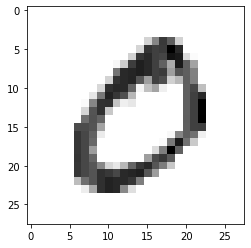

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [20]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_train, axis = 1)

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics =  ["accuracy"])
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2626 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0739 - accuracy: 0.9769


In [22]:
model.save("epic_num_reader.model")

new_model = tf.keras.models.load_model("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [23]:
predictions = new_model.predict([x_test])

In [24]:
print(predictions)

[[1.6398971e-12 2.4799597e-06 1.6387570e-07 ... 1.1647131e-07
  2.2687740e-08 5.8483638e-06]
 [9.9983549e-01 1.0077205e-06 1.2748661e-04 ... 1.2376368e-06
  5.8692393e-08 2.7571175e-05]
 [6.8442915e-08 2.4138537e-04 3.7022008e-04 ... 6.9048867e-05
  4.4338769e-04 9.0315886e-04]
 ...
 [1.6730180e-14 1.1712350e-09 2.9084888e-12 ... 7.7333355e-13
  5.4459953e-08 8.9370724e-07]
 [2.9076313e-05 5.7748275e-05 1.6108386e-05 ... 3.0254969e-07
  1.7484277e-06 5.3618855e-08]
 [7.0305746e-06 8.3576808e-08 6.5461145e-06 ... 1.6114777e-06
  9.9996269e-01 9.0296874e-07]]


In [27]:
import numpy as np
print(np.argmax(predictions[1]))

0


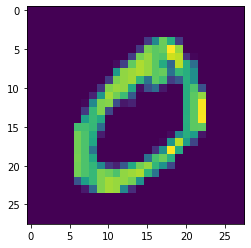

In [28]:
plt.imshow(x_test[1])
plt.show()